##  Assignment (Resolute AI Software Private Limited)


## User-based Recommendation (Task 3)
##         -> Vidul Garg 

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
df=pd.read_csv(r"D:\MachineLearning\Extra\OnlineRetail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


## Convert 'InvoiceDate' to a datetime object and sorting according to it

In [340]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='mixed')

# Sort the dataset by 'InvoiceDate'
df.sort_values(by='InvoiceDate', inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


## Handling Missing values

In [341]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [342]:
# Filling 'Description' column

# Group by 'StockCode' and finding mode()
most_freq = df.groupby('StockCode')['Description'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
# Fill missing values based on 'StockCode'
df['Description'].fillna(most_freq, inplace=True)

In [343]:
# Handling rest of the missing values
df.dropna(inplace=True)

In [344]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [345]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


 ## Top 15 Items

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(4, 0, 'PARTY BUNTING'),
  Text(5, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(6, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(7, 0, 'POSTAGE'),
  Text(8, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(9, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(10, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(11, 0, 'SPOTTY BUNTING'),
  Text(12, 0, 'LUNCH BAG SPACEBOY DESIGN '),
  Text(13, 0, 'LUNCH BAG CARS BLUE'),
  Text(14, 0, 'NATURAL SLATE HEART CHALKBOARD ')])

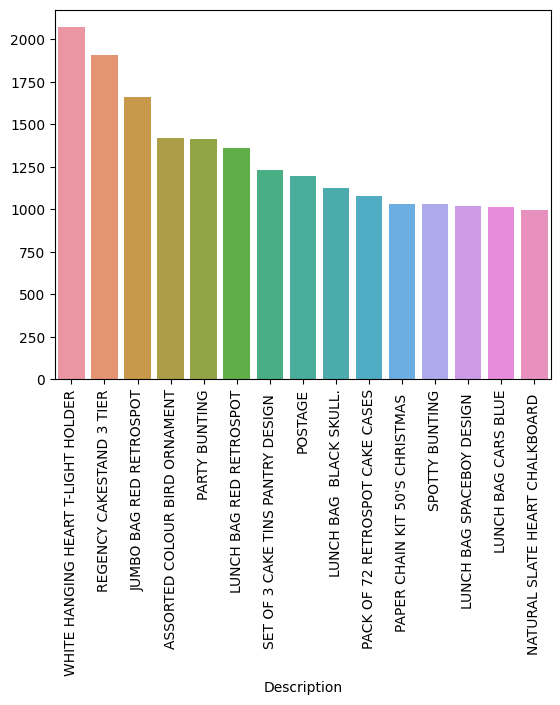

In [346]:
#Top 15 items
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
sns.barplot(x=item_counts.index, y=item_counts.values)
plt.xticks(rotation=90)

## Top 15 Customers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '12748.0'),
  Text(1, 0, '13089.0'),
  Text(2, 0, '13263.0'),
  Text(3, 0, '14096.0'),
  Text(4, 0, '14156.0'),
  Text(5, 0, '14159.0'),
  Text(6, 0, '14298.0'),
  Text(7, 0, '14606.0'),
  Text(8, 0, '14646.0'),
  Text(9, 0, '14796.0'),
  Text(10, 0, '14911.0'),
  Text(11, 0, '15039.0'),
  Text(12, 0, '15311.0'),
  Text(13, 0, '17841.0'),
  Text(14, 0, '18118.0')])

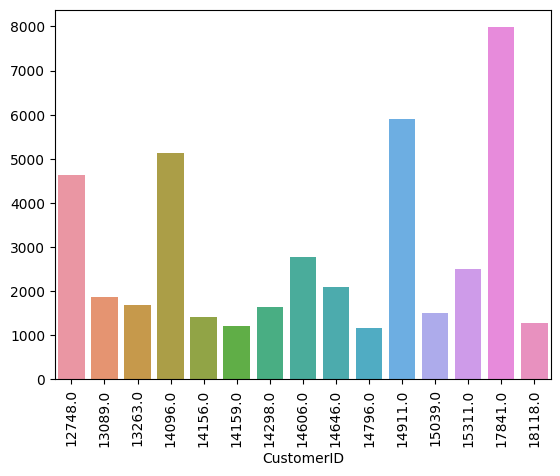

In [347]:
#Top 15 Customers
item_counts = df['CustomerID'].value_counts().sort_values(ascending=False).iloc[0:15]
sns.barplot(x=item_counts.index, y=item_counts.values)
plt.xticks(rotation=90)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [349]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [350]:
df["Quantity"].unique()

array([     6,      8,      2,      3,      4,     32,     24,     20,
           36,     12,     18,     48,     80,     64,     96,     10,
          120,      1,     -1,     23,      5,     50,     40,    100,
          192,    432,    144,    288,    -24,    -12,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -3,     -7,     -5,
           11,    252,     70,     60,    216,    384,     27,    108,
           52,  -9360,     42,    270,     75,    240,     90,    320,
           17,   1824,    204,     69,   -144,   -192,    -36,    160,
         2880,   1400,     39,     19,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,   1008,    208,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [351]:
df = df[df['Quantity'] >= 0]
df["Quantity"].unique()

array([    6,     8,     2,     3,     4,    32,    24,    20,    36,
          12,    18,    48,    80,    64,    96,    10,   120,     1,
          23,     5,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,   252,    70,    60,   216,   384,
          27,   108,    52,    42,   270,    75,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    39,    19,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,  1008,   208,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   114,   186,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    46,

## CustomerID as the user identifier.
## Choosing Description as the item identifier
## Quantity as a user-item interactions or preference

In [352]:
# Example: Creating a user-item matrix
new_df = df.pivot_table(index='CustomerID', columns='Description', values='Quantity',aggfunc='sum', fill_value=0)
new_df.head(15) #vectors

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [353]:
new_df.columns

Index([' 4 PURPLE FLOCK DINNER CANDLES', ' 50'S CHRISTMAS GIFT BAG LARGE',
       ' DOLLY GIRL BEAKER', ' I LOVE LONDON MINI BACKPACK',
       ' I LOVE LONDON MINI RUCKSACK', ' NINE DRAWER OFFICE TIDY',
       ' OVAL WALL MIRROR DIAMANTE ', ' RED SPOT GIFT BAG LARGE',
       ' SET 2 TEA TOWELS I LOVE LONDON ', ' SPACEBOY BABY GIFT SET',
       ...
       'ZINC STAR T-LIGHT HOLDER ', 'ZINC SWEETHEART SOAP DISH',
       'ZINC SWEETHEART WIRE LETTER RACK', 'ZINC T-LIGHT HOLDER STAR LARGE',
       'ZINC T-LIGHT HOLDER STARS LARGE', 'ZINC T-LIGHT HOLDER STARS SMALL',
       'ZINC TOP  2 DOOR WOODEN SHELF ', 'ZINC WILLIE WINKIE  CANDLE STICK',
       'ZINC WIRE KITCHEN ORGANISER', 'ZINC WIRE SWEETHEART LETTER TRAY'],
      dtype='object', name='Description', length=3877)

In [354]:
# Changing to 1 If any value greater than 0
new_df = new_df.applymap(lambda x: 1 if x > 0 else 0)
new_df.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Calculating similarity between users (customers)

In [355]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_df= pd.DataFrame(cosine_similarity(new_df))
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.012938,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.101565,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.168053,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.121900,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.113547,0.015237
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044118,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4335,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.045835,0.000000
4336,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017504,0.000000
4337,0.0,0.101565,0.168053,0.113547,0.044118,0.078939,0.0,0.111463,0.033634,0.091616,...,0.0,0.036564,0.016205,0.042875,0.000000,0.000000,0.045835,0.017504,1.000000,0.094726


In [356]:
similarity_df.shape

(4339, 4339)

In [357]:
# Distance(similarity) of first user with others
similarity_df[0]

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4334    0.0
4335    0.0
4336    0.0
4337    0.0
4338    0.0
Name: 0, Length: 4339, dtype: float64

In [358]:
# Re-labelling the columns for better understanding
# Change the index from 0 to 4339 to the Customer IDs 
similarity_df.columns = new_df.index

similarity_df['CustomerID'] = new_df.index
similarity_df = similarity_df.set_index('CustomerID')
similarity_df.head(5)

CustomerID,12346,12347,12348,12349,12350,12352,12353,12354,12355,12356,...,18273,18274,18276,18277,18278,18280,18281,18282,18283,18287
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.012938,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.101565,0.012828
12348,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.168053,0.083269
12349,0.0,0.046130,0.024953,1.000000,0.056773,0.121900,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.113547,0.015237
12350,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044118,0.000000


In [359]:
similarity_df[12358]

CustomerID
12346    0.000000
12347    0.000000
12348    0.059131
12349    0.097384
12350    0.067267
           ...   
18280    0.000000
18281    0.000000
18282    0.000000
18283    0.050450
18287    0.036108
Name: 12358, Length: 4339, dtype: float64

In [360]:
# Finding list of similar items
#let's find only top 10 similar ( [1:11] ) for user number 3
# sorted(list(enumerate(similarity_df[12358])),reverse=True,key=lambda x:x[1])[1:11]
similarity_df.loc[12358].sort_values(ascending=False)[1:11]

CustomerID
14155    0.452911
18240    0.452911
14145    0.452911
13551    0.416025
12917    0.392232
15442    0.392232
12665    0.320256
16565    0.320256
13777    0.277350
15355    0.277350
Name: 12358, dtype: float64

In [361]:
import datetime
target_data = df[(df['CustomerID'] == 12358) & (df['InvoiceDate'].dt.date == datetime.date(2011, 7, 12))]
target_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
259746,559707,POST,POSTAGE,2,2011-07-12 10:04:00,40.00,12358,Austria
259741,559707,15056N,EDWARDIAN PARASOL NATURAL,12,2011-07-12 10:04:00,5.95,12358,Austria
259745,559707,22063,CERAMIC BOWL WITH STRAWBERRY DESIGN,6,2011-07-12 10:04:00,2.95,12358,Austria
259744,559707,21232,STRAWBERRY CERAMIC TRINKET BOX,12,2011-07-12 10:04:00,1.25,12358,Austria
259743,559707,15056BL,EDWARDIAN PARASOL BLACK,12,2011-07-12 10:04:00,5.95,12358,Austria
259742,559707,20679,EDWARDIAN PARASOL RED,12,2011-07-12 10:04:00,5.95,12358,Austria
259740,559707,15056P,EDWARDIAN PARASOL PINK,12,2011-07-12 10:04:00,5.95,12358,Austria
259738,559707,37447,CERAMIC CAKE DESIGN SPOTTED PLATE,12,2011-07-12 10:04:00,1.49,12358,Austria
259737,559707,37449,CERAMIC CAKE STAND + HANGING CAKES,2,2011-07-12 10:04:00,9.95,12358,Austria
259736,559707,22059,CERAMIC STRAWBERRY DESIGN MUG,12,2011-07-12 10:04:00,1.49,12358,Austria


In [362]:
target_products = target_data['Description'].unique()
target_products

array(['POSTAGE', 'EDWARDIAN PARASOL NATURAL',
       'CERAMIC BOWL WITH STRAWBERRY DESIGN',
       'STRAWBERRY CERAMIC TRINKET BOX', 'EDWARDIAN PARASOL BLACK',
       'EDWARDIAN PARASOL RED', 'EDWARDIAN PARASOL PINK',
       'CERAMIC CAKE DESIGN SPOTTED PLATE',
       'CERAMIC CAKE STAND + HANGING CAKES',
       'CERAMIC STRAWBERRY DESIGN MUG', 'FAIRY CAKE DESIGN UMBRELLA',
       'DOORMAT FAIRY CAKE'], dtype=object)

In [363]:
# Top 10 similar customers od '12358'
similar_customers = similarity_df[12358].sort_values(ascending=False).index[1:11]
similar_customers
# similarity_df.loc[12358].sort_values(ascending=False)[1:11]

Index([14155, 18240, 14145, 13551, 12917, 15442, 12665, 16565, 13777, 15355], dtype='int32', name='CustomerID')

In [366]:
def recommend (customer,date):
    target_date=pd.to_datetime(date)
    target_data = df[(df['CustomerID'] == customer_id) & (df['InvoiceDate'].dt.date == target_date.date())]
    target_products = target_data['Description'].unique()
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).index[1:]
    
    recommendations = []
    for customer in similar_customers:
        customer_data = df[(df['CustomerID'] == customer) & (df['InvoiceDate'].dt.date == target_date.date())]
        customer_products = customer_data['Description'].unique()
        recommended_products = [product for product in customer_products if product not in target_products]
        recommendations.extend(recommended_products)  # Extend add multiple items together in the list
        
    return recommendations[:10]

In [367]:
customer_id = 12347
date = '2010-12-01'
recommended_items = recommend(customer_id, date)
print(recommended_items)

['RED  HARMONICA IN BOX ', 'YELLOW SHARK HELICOPTER', 'CARRIAGE', 'BOX OF VINTAGE ALPHABET BLOCKS', 'TRADITIONAL WOODEN SKIPPING ROPE', 'WOODEN BOX OF DOMINOES', "DOCTOR'S BAG SOFT TOY", 'TOOL BOX SOFT TOY ', 'RED SHARK HELICOPTER', 'BLUE DRAGONFLY HELICOPTER']


In [ ]:
customer_id = 12358
date = '2010-12-01'
print(recommend(customer_id, date))